In [1]:
# import libraries 
import pandas as pd

In [2]:
# read the data
df = pd.read_csv("seventhClean.csv",date_parser=['Date'])

# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

<li>Date</li>
<li>Latitude</li>
<li>Longitude</li>
<li>Time difference(seconds)</li>

In [3]:
df.head()

,Date,Latitude,Longitude,Time difference
0,2019-12-03 09:48:08+00:00,51.517431,-0.082458,61518.0
1,2019-12-04 02:53:26+00:00,51.516814,-0.081620,1351.0
2,2019-12-04 03:15:57+00:00,51.513114,-0.086272,12022.0
3,2019-12-04 06:36:19+00:00,51.518060,-0.110683,21659.0
4,2019-12-04 12:37:18+00:00,51.517680,-0.078484,63350.0


In [4]:
df.describe()

,Latitude,Longitude,Time difference
count,1333.000000,1333.000000,1332.000000
mean,51.514669,-0.086765,70678.316817
std,0.005592,0.012269,98584.496219
min,51.503196,-0.127032,0.000000
25%,51.511794,-0.094720,3873.500000
50%,51.514457,-0.084701,29088.000000
75%,51.517032,-0.078484,88748.750000
max,51.592365,0.004717,768764.000000


In [5]:
# check for null values
df.isnull().sum()

Date               0
Latitude           0
Longitude          0
Time difference    1
dtype: int64

In [6]:
# shift time difference rows by 1
df['Time difference'] = df['Time difference'].shift(1)
df.head()

,Date,Latitude,Longitude,Time difference
0,2019-12-03 09:48:08+00:00,51.517431,-0.082458,NaN
1,2019-12-04 02:53:26+00:00,51.516814,-0.081620,61518.0
2,2019-12-04 03:15:57+00:00,51.513114,-0.086272,1351.0
3,2019-12-04 06:36:19+00:00,51.518060,-0.110683,12022.0
4,2019-12-04 12:37:18+00:00,51.517680,-0.078484,21659.0


In [7]:
# drop the first row
df.drop(df.index[0], inplace=True)

In [8]:
df.head()

,Date,Latitude,Longitude,Time difference
1,2019-12-04 02:53:26+00:00,51.516814,-0.081620,61518.0
2,2019-12-04 03:15:57+00:00,51.513114,-0.086272,1351.0
3,2019-12-04 06:36:19+00:00,51.518060,-0.110683,12022.0
4,2019-12-04 12:37:18+00:00,51.517680,-0.078484,21659.0
5,2019-12-05 06:13:08+00:00,51.516814,-0.081620,63350.0


In [9]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
# define x and y 
x = df.drop(['Date'], axis=1)
# y with latitude and longitude and time
y = df[['Latitude','Longitude','Time difference']]
print(x.shape)
print(y.shape)

(1332, 3)
(1332, 3)


In [11]:
# scale the data
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

In [12]:
print(x.shape)
print(y.shape)

(1332, 3)
(1332, 3)


In [13]:
# print x.head()
x.head()

,Latitude,Longitude,Time difference
1,51.516814,-0.081620,61518.0
2,51.513114,-0.086272,1351.0
3,51.518060,-0.110683,12022.0
4,51.517680,-0.078484,21659.0
5,51.516814,-0.081620,63350.0


In [14]:
# print y.head()
y.head()

,Latitude,Longitude,Time difference
1,51.516814,-0.081620,61518.0
2,51.513114,-0.086272,1351.0
3,51.518060,-0.110683,12022.0
4,51.517680,-0.078484,21659.0
5,51.516814,-0.081620,63350.0


In [15]:
import numpy as np
np.set_printoptions(suppress=True) # avoid scientific notation in numpy array so that it is easier to read and understand

In [16]:
def create_dataset(x,y,time_steps=1):
    Xs,ys = [],[]
    for i in range(len(x)-time_steps):
        v = x[i:(i+time_steps)]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
# create the dataset
time_steps = 10
X, Y = create_dataset(x_scaled, y_scaled, time_steps)

In [18]:
print(X.shape)
print(Y.shape)

(1322, 10, 3)
(1322, 3)


In [19]:
# print the first 1 rows of the dataset
print(X[0:1])
print(Y[0:1])

[[[ 0.3839403   0.41961434 -0.09295333]
  [-0.27780743  0.04043452 -0.7034915 ]
  [ 0.60678832 -1.94928144 -0.59520867]
  [ 0.53882504  0.67522653 -0.49741825]
  [ 0.3839403   0.41961434 -0.07436331]
  [ 0.42292976 -0.21868256  0.90949744]
  [ 0.42292976 -0.21868256 -0.70599791]
  [-0.27458811 -0.32130238 -0.5443195 ]
  [ 0.07291887  0.75437176  1.19300544]
  [-0.28907502 -1.40463837  0.15000569]]]
[[0.3839403  0.41961434 0.9925234 ]]


In [20]:
# transform Y to 3Dimensional
Y = Y.reshape(Y.shape[0], Y.shape[1], 1)

In [21]:
print(Y.shape)

(1322, 3, 1)


In [22]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
# create lstm model
import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [24]:
def create_model():
    model = models.Sequential()
    model.add(layers.LSTM(512, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(layers.LSTM(512, return_sequences=True))
    model.add(layers.LSTM(128))
    model.add(layers.Dense(3))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [25]:
# model summary
model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 512)           1056768   
                                                                 
 lstm_1 (LSTM)               (None, 10, 512)           2099200   
                                                                 
 lstm_2 (LSTM)               (None, 128)               328192    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 3,484,547
Trainable params: 3,484,547
Non-trainable params: 0
_________________________________________________________________


In [26]:
# fit the model
history = model.fit(X_train, y_train, epochs=90, batch_size=512, validation_data=(X_test, y_test), verbose=1)

Epoch 1/90
3/3 [==============================] - 5s 404ms/step - loss: 1.1093 - mae: 0.7304 - val_loss: 0.7735 - val_mae: 0.6490
Epoch 2/90
3/3 [==============================] - 0s 30ms/step - loss: 1.0668 - mae: 0.7075 - val_loss: 0.7852 - val_mae: 0.6473
Epoch 3/90
3/3 [==============================] - 0s 30ms/step - loss: 1.0661 - mae: 0.7117 - val_loss: 0.7698 - val_mae: 0.6472
Epoch 4/90
3/3 [==============================] - 0s 30ms/step - loss: 1.0588 - mae: 0.7100 - val_loss: 0.7682 - val_mae: 0.6425
Epoch 5/90
3/3 [==============================] - 0s 30ms/step - loss: 1.0562 - mae: 0.7024 - val_loss: 0.7682 - val_mae: 0.6377
Epoch 6/90
3/3 [==============================] - 0s 31ms/step - loss: 1.0541 - mae: 0.6983 - val_loss: 0.7991 - val_mae: 0.6527
Epoch 7/90
3/3 [==============================] - 0s 30ms/step - loss: 1.0562 - mae: 0.7072 - val_loss: 0.7805 - val_mae: 0.6529
Epoch 8/90
3/3 [==============================] - 0s 35ms/step - loss: 1.0479 - mae: 0.7079 - va

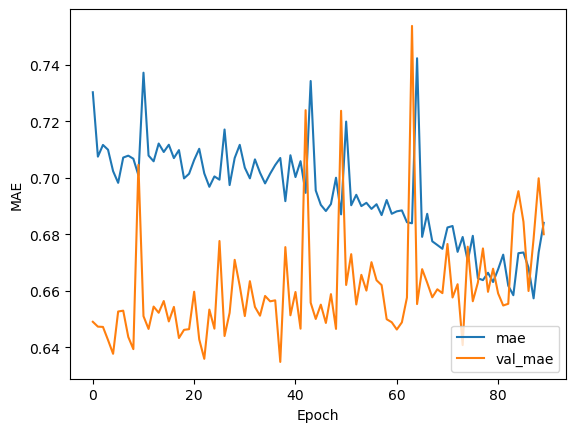

In [27]:
# plot the mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='lower right')
plt.show()


In [28]:
# model prediction on test data
y_pred = model.predict(X_test)

9/9 [==============================] - 1s 8ms/step


In [29]:
# inverse transform the data
y_pred = scaler.inverse_transform(y_pred)

In [30]:
# print the first 1 rows of the dataset
print(y_pred[0:1])

[[   51.515373      -0.08573383 51216.402     ]]


In [31]:
# print the actual values and inverse transform the data
y_test_orig = scaler.inverse_transform(y_test.reshape(y_test.shape[0], y_test.shape[1]))

In [32]:
# get the actual values 1
print(y_test_orig[0:1])

[[   51.513377    -0.096363 83269.      ]]
